# Importando os codigos

In [1]:
from preprocess import pre_processing
from teste_estacionaridade import teste_estacionaridade
from diferenciacao import diferenciacao, invert_diferenciacao, invert_diferenciacao_treino
from predicao import forecast
from validacao import acuracia, rmse, mape
from sep_treinoteste import split

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# Importando os dados e limpando eles

In [2]:
arquivador_realizado, arquivador_df , arquivador_lojas = pre_processing()

Dados importados
Base de dados limpa
Base segmentada


# Realizando os testes de estacionariedade

In [3]:
estac   = [0,0,0,0]
n_estac = [0,0,0,0]
for i in range(len(arquivador_realizado)):
    estac[i], n_estac[i] = teste_estacionaridade(arquivador_realizado[i], arquivador_df[i])

Dickey-Fuller Test
Quant. estacionárias = 0 e não estacionárias 4
Dickey-Fuller Test
Quant. estacionárias = 0 e não estacionárias 1
Dickey-Fuller Test
Quant. estacionárias = 0 e não estacionárias 3
Dickey-Fuller Test
Quant. estacionárias = 2 e não estacionárias 0


In [4]:
#Séries faltantes
print(arquivador_realizado[0].shape)
print(arquivador_realizado[1].shape)
print(arquivador_realizado[2].shape)
print(arquivador_realizado[3].shape)

(60, 4)
(50, 1)
(46, 3)
(34, 2)


# Diferenciando as series nao estacionarias 

In [5]:
df_estac2    = [0,0,0,0]
estac2       = [0,0,0,0]
df_n_estac_2 = [0,0,0,0]
n_estac2     = [0,0,0,0]
for i in range(len(arquivador_realizado)): 
    df_estac2[i],  estac2[i], df_n_estac_2[i], n_estac2[i] = diferenciacao(arquivador_realizado[i])

Processo de diferenciação
Quant. estacionárias = 2 e não estacionárias 2
Shape Df de estacionarias =(59, 2) e de não estacionarias =(59, 2)
Processo de diferenciação
Quant. estacionárias = 1 e não estacionárias 0
Shape Df de estacionarias =(49, 1) e de não estacionarias =(49, 0)
Processo de diferenciação
Quant. estacionárias = 3 e não estacionárias 0
Shape Df de estacionarias =(38, 3) e de não estacionarias =(38, 0)
Processo de diferenciação
Quant. estacionárias = 2 e não estacionárias 0
Shape Df de estacionarias =(32, 2) e de não estacionarias =(32, 0)


In [6]:
#Segunda diferenciação
df_estac3    = [0,0,0,0]
estac3       = [0,0,0,0]
df_n_estac3  = [0,0,0,0]
n_estac3     = [0,0,0,0]

for i in range(len(arquivador_realizado)):
    if  len(n_estac2[i]) > 0:
        df_estac3[i],  estac3[i], df_n_estac3[i], n_estac3[i] = diferenciacao(df_n_estac_2[i]) 

Processo de diferenciação
Quant. estacionárias = 2 e não estacionárias 0
Shape Df de estacionarias =(58, 2) e de não estacionarias =(58, 0)


# Treino Teste

In [7]:
arquivador_treino = [0,0,0,0]
arquivador_teste  = [0,0,0,0]
lojas_ = [0,0,0,0]

for i in range(len(arquivador_realizado)):
    if estac3[i]!=0:
        lojas_[i] = list(set(estac3[i])| set(estac2[i]))
        arquivador_treino[i] = pd.DataFrame(columns=lojas_[i])
        arquivador_teste[i]  = pd.DataFrame(columns=lojas_[i])
        for loja in lojas_[i]:
            try:
                arquivador_treino[i][loja], arquivador_teste[i][loja] = split(df_estac3[i][loja], 0.8)
            except:
                arquivador_treino[i][loja], arquivador_teste[i][loja] = split(df_estac2[i][loja], 0.8)
    
    else:
        lojas_[i] = estac2[i]
        arquivador_treino[i] = pd.DataFrame(columns=lojas_[i])
        arquivador_teste[i]  = pd.DataFrame(columns=lojas_[i])
        for loja in lojas_[i]:
            arquivador_treino[i][loja], arquivador_teste[i][loja] = split(df_estac2[i][loja], 0.8)          
    arquivador_treino[i].to_csv(r'C:\Users/MKM/Documents/treino{}.txt'.format(i), index = True, header = lojas_[i])


In [8]:
#treino.to_csv(r'C:\Users/MKM/Documents/App_1.1/static/downloads/treino4.txt', index = True, header = estac2)
 

# Modelo de predição

In [9]:
arquivador_previsao = [0,0,0,0]

for i in range(len(arquivador_realizado)):
    arquivador_previsao[i]  = pd.DataFrame(columns=lojas_[i])
    for loja in lojas_[i]:
        arquivador_previsao[i][loja] = forecast(arquivador_treino[i][loja])
    
    arquivador_previsao[i].to_csv(r'C:\Users/MKM/Documents/previsao{}.txt'.format(i), index = True, header = lojas_[i])

Realizando a predição
Definindo parametros



Os parametros utilizados foram p: 2, q: 2, P: 1, Q: 0.
Realizando a predição
Definindo parametros



Os parametros utilizados foram p: 2, q: 2, P: 0, Q: 0.
Realizando a predição
Definindo parametros



Os parametros utilizados foram p: 4, q: 4, P: 1, Q: 1.
Realizando a predição
Definindo parametros



Os parametros utilizados foram p: 4, q: 4, P: 1, Q: 1.
Realizando a predição
Definindo parametros



Os parametros utilizados foram p: 3, q: 4, P: 1, Q: 0.
Realizando a predição
Definindo parametros



Os parametros utilizados foram p: 4, q: 2, P: 0, Q: 0.
Realizando a predição
Definindo parametros



Os parametros utilizados foram p: 3, q: 4, P: 0, Q: 0.
Realizando a predição
Definindo parametros



Os parametros utilizados foram p: 2, q: 3, P: 1, Q: 1.
Realizando a predição
Definindo parametros



Os parametros utilizados foram p: 3, q: 3, P: 0, Q: 0.
Realizando a predição
Definindo parametros



Os parametros utilizados foram p: 5, q: 2, P: 1, Q: 1.


# Retirando a diferenciação

In [11]:
arquivador_previsao_ = arquivador_previsao

arquivador_tam = [0,0,0,0]
for n in range(len(arquivador_realizado)):
    tam_treino = []
    for loja in arquivador_previsao_[n]:
        tam_treino.append(len(arquivador_realizado[n][loja].dropna()))
    arquivador_tam[n] = tam_treino
    arquivador_tam[n] = max(arquivador_tam[n])
    arquivador_tam[n] = arquivador_tam[n]-1


In [13]:
arquivador_realizado, arquivador_df , arquivador_lojas = pre_processing()
from datetime import datetime
from dateutil.relativedelta import relativedelta  

for n in range(len(arquivador_realizado)):
    for loja in arquivador_previsao_[n]:

        df_prev      = pd.DataFrame(arquivador_previsao_[n][loja])

        primeiro_dia = datetime.strftime(arquivador_teste[n][loja].index.tolist()[0], '%Y-%m-%d')
        primeiro_dia = datetime.strptime(primeiro_dia, '%Y-%m-%d') - relativedelta(months=1)
        ultimo_dia   = datetime.strftime(arquivador_teste[n][loja]['2019'].index.tolist()[-1], '%Y-%m-%d')

        df_prev = df_prev[primeiro_dia:ultimo_dia].replace(np.nan, 0).astype(int)
        antiga  = arquivador_realizado[n][loja][primeiro_dia:ultimo_dia].shift().replace(np.nan,0).astype(int)

        if len(arquivador_treino[n][loja].dropna()) == arquivador_tam[n]:

            arquivador_previsao_[n][loja] = df_prev.add(antiga, axis = 0)
        else:
            arquivador_previsao_[n][loja] = df_prev.add(antiga, axis = 0)
            arquivador_previsao_[n][loja] = df_prev.add(antiga, axis = 0)
    arquivador_previsao_[i].to_csv(r'C:\Users/MKM/Documents/prodicao{}.txt'.format(n), index = True, header = lojas_[i])

Dados importados
Base de dados limpa
Base segmentada


# Retornando os dados para o dataframe


In [15]:
# Importando o df original
original = pd.read_csv('static/uploads/VendasBrutasBaseTeste.csv', parse_dates=['DATA']).sort_values(ascending = True, by = 'DATA')

In [16]:
ano = '2019'

arq_projecao = arquivador_previsao_ 

for i in range(len(arquivador_previsao_)):
    arq_projecao[i].reset_index(inplace = True)
    arq_projecao[i].rename({'index':'data'}, axis = 'columns', inplace=True)
    arq_projecao[i] = pd.melt(arq_projecao[i], id_vars='data', value_vars=arq_projecao[i].columns.tolist()[1:], value_name = 'predicao')
    arq_projecao[i] = arq_projecao[i][arq_projecao[i]['data'].dt.strftime('%Y') == ano]
    arq_projecao[i].reset_index(inplace= True, drop=True)



In [17]:
original['id']     = original["NOME_LOJA_COMPLETO"].str.lower()

for i in range(len(original.NOME_LOJA_COMPLETO)):  
    original.id[i] = original['id'][i].replace(" ", "")
    original.id[i] = original['id'][i].replace("-", "")

#Criando um dicionário com as principais informações do dataframe original
original_dict = original[['NOME_LOJA_COMPLETO', 'CODIGO_LOJA', 'NOME_LOJA', 'REGIONAL',
       'GGL', 'GERENTE_N1', 'GERENTE_N2', 'CIDADE', 'ESTADO', 'UF',  'id']].to_dict('records')

res_list = []
for i in range(len(original_dict)):
    if original_dict[i] not in original_dict[i + 1:]:
        res_list.append(original_dict[i])

In [18]:
# Criando um looping de iterações para que cada Id com sua respctiva data tenha uma linha no df novo com as  informações faltantes
dados_graficos = original
for n in range(len(arquivador_previsao_)):

    row_df = pd.DataFrame([])

    for j in range(len(arquivador_previsao_[n])):

        for i in range(len(res_list)):

            if (arq_projecao[n].iloc[j,1] == res_list[i]['id']):

                row = pd.Series([arquivador_previsao_[n].iloc[j,0], arquivador_previsao_[n].iloc[j,1], arquivador_previsao_[n].iloc[j,2], res_list[i]['NOME_LOJA_COMPLETO'], res_list[i]['CODIGO_LOJA'], res_list[i]['REGIONAL'], res_list[i]['GGL'], res_list[i]['GERENTE_N1'], res_list[i]['GERENTE_N2'], res_list[i]['CIDADE'], res_list[i]['ESTADO'], res_list[i]['UF']])

                row_df = row_df.append(row, ignore_index=True)
    
    row_df.columns = ['data', 'variable', 'predicao', 'NOME_LOJA_COMPLETO', 'CODIGO_LOJA', 'REGIONAL', 'GGL', 'GERENTE_N1', 'GERENTE_N2',  'CIDADE', 'ESTADO', 'UF']
    
    to_apend = row_df

    # Dropando as colunas não necessárias
    to_apend = to_apend.drop(['variable'], axis = 1)

    # Renomeando as colunas no dataframe a ser apendado
    to_apend.rename(columns={'data': 'DATA', 'predicao': 'VENDA_BRUTA'}, inplace = True)

    # Criando um dataframe com o nome das colunas do dataframe original
    colunas = original.columns

    # Inserindo as colunas faltantes para ficar igual ao dataframe original

    to_apend['ORC_REAL']='PREDITO'
    to_apend['PERIODO']='tbd'
    to_apend['ANO'] = to_apend['DATA'].dt.year
    to_apend['MES'] = to_apend['DATA'].dt.month
    to_apend['DIA'] = to_apend['DATA'].dt.day
    to_apend['ANO-MES'] = 'tbd'
    to_apend['NOME_LOJA'] = to_apend['NOME_LOJA_COMPLETO']
    to_apend['MODELO']='tbd'
    to_apend['DESEMPENHO']='tbd'

    to_apend = to_apend.reindex(columns=colunas)

    dados_graficos = pd.concat([dados_graficos, to_apend])
    

# Calculo da acuracia

In [23]:
lojas_pred = dados_graficos.loc[(dados_graficos.ORC_REAL == 'PREDITO', 'NOME_LOJA_COMPLETO')].unique()

arquivador_acu = pd.DataFrame(columns = ['ERRO', 'MAE', 'MFE', 'MSE', 'RMSE', 'MAPE'])

,VENDA_BRUTA,NOME_LOJA_COMPLETO
DATA,,
2019-01-01,NaN,00298 - SH PARTAGE RIO GRANDE
2019-02-01,55513283.0,00298 - SH PARTAGE RIO GRANDE
2019-03-01,59319733.0,00298 - SH PARTAGE RIO GRANDE
2019-04-01,62142870.0,00298 - SH PARTAGE RIO GRANDE
2019-05-01,64726209.0,00298 - SH PARTAGE RIO GRANDE
2019-06-01,67471675.0,00298 - SH PARTAGE RIO GRANDE
2019-07-01,70126956.0,00298 - SH PARTAGE RIO GRANDE
2019-08-01,72718636.0,00298 - SH PARTAGE RIO GRANDE
2019-09-01,75274570.0,00298 - SH PARTAGE RIO GRANDE


In [24]:
for loja in lojas_pred:
    orcado  = dados_graficos.loc[(dados_graficos.NOME_LOJA_COMPLETO == loja)&(dados_graficos.ORC_REAL == "ORCADO")][['DATA','VENDA_BRUTA','NOME_LOJA_COMPLETO']].set_index('DATA')
    
    predito = dados_graficos.loc[(dados_graficos.NOME_LOJA_COMPLETO == loja)&(dados_graficos.ORC_REAL == "PREDITO")][['DATA','VENDA_BRUTA','NOME_LOJA_COMPLETO']].set_index('DATA').dropna()
    fodase = acuracia(orcado.VENDA_BRUTA, predito.VENDA_BRUTA)
    fodase.drop(columns = ['Métricas'], inplace = True)
    fodase = fodase.T
    fodase.columns = ['ERRO', 'MAE', 'MFE', 'MSE', 'RMSE', 'MAPE']
    fodase.reset_index(drop = True, inplace = True)
    fodase['NOME_LOJA_COMPLETO'] = orcado.NOME_LOJA_COMPLETO.drop_duplicates().reset_index(drop = True)
    arquivador_acu = pd.concat([arquivador_acu, fodase])
arquivador_acu.reset_index(drop = True, inplace = True)
arquivador_acu.to_csv('static\downloads\erros.csv')

dados_graficos = pd.merge(left=dados_graficos, right=arquivador_acu[['MAPE', 'NOME_LOJA_COMPLETO']], how='left', left_on='NOME_LOJA_COMPLETO', right_on='NOME_LOJA_COMPLETO')

In [26]:
dados_graficos.drop(columns='id', inplace=True)
dados_graficos.to_csv('static/uploads/Dados_graficos_base_teste.csv')

In [27]:
dados_graficos

,NOME_LOJA_COMPLETO,ORC_REAL,PERIODO,VENDA_BRUTA,ANO,MES,DIA,ANO-MES,DATA,CODIGO_LOJA,...,REGIONAL,GGL,GERENTE_N1,GERENTE_N2,CIDADE,ESTADO,UF,MODELO,DESEMPENHO,MAPE
0,00037 - SH NITEROI PLAZA,ORCADO,42005,4142145.0,2015,1,1,2015-01,2015-01-01,37.0,...,RJ II,GGL3,Teresa Meirelles,Claudio Ugo,Niterói,Rio de Janeiro,RJ,NaN,NaN,8.3
1,00012 - SH IGUATEMI CAXIAS,REALIZADO,42005,2323807.0,2015,1,1,2015-01,2015-01-01,12.0,...,RS I,GGL1,Regina Leites,Regina Leites,Caxias do Sul,Rio Grande do Sul,RS,NaN,NaN,7.0
2,00072 - SH PARQUE DOM PEDRO,ORCADO,42005,2840836.0,2015,1,1,2015-01,2015-01-01,72.0,...,SP IV,GGL1,Alexsandra Quilici,Fernando Schwertner,Campinas,São Paulo,SP,NaN,NaN,98.1
3,00072 - SH PARQUE DOM PEDRO,REALIZADO,42005,3150730.0,2015,1,1,2015-01,2015-01-01,72.0,...,SP IV,GGL1,Alexsandra Quilici,Fernando Schwertner,Campinas,São Paulo,SP,NaN,NaN,98.1
4,00125 - SH CAXIAS,REALIZADO,42005,1025211.0,2015,1,1,2015-01,2015-01-01,125.0,...,RJ II,GGL3,Teresa Meirelles,Claudio Ugo,Duque de Caxias,Rio de Janeiro,RJ,NaN,NaN,44.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1387,00396 - SH ITAQUA GARDEN,PREDITO,tbd,914558.0,2019,8,1,tbd,2019-08-01,396.0,...,SP I,GGL2,Rafael Moura,Maurício Braga,Itaquaquecetuba,São Paulo,SP,tbd,tbd,124.8
1388,00396 - SH ITAQUA GARDEN,PREDITO,tbd,554400.0,2019,9,1,tbd,2019-09-01,396.0,...,SP I,GGL2,Rafael Moura,Maurício Braga,Itaquaquecetuba,São Paulo,SP,tbd,tbd,124.8
1389,00396 - SH ITAQUA GARDEN,PREDITO,tbd,661762.0,2019,10,1,tbd,2019-10-01,396.0,...,SP I,GGL2,Rafael Moura,Maurício Braga,Itaquaquecetuba,São Paulo,SP,tbd,tbd,124.8
1390,00396 - SH ITAQUA GARDEN,PREDITO,tbd,789108.0,2019,11,1,tbd,2019-11-01,396.0,...,SP I,GGL2,Rafael Moura,Maurício Braga,Itaquaquecetuba,São Paulo,SP,tbd,tbd,124.8


# LIXEIRA

TESTE


In [51]:
serie_antiga_ = arquivador_realizado[n]["00334shcerrado"]#df_estac2["00233shcontinentepark"]

treino_, teste_ = split(df_estac2["00334shcerrado"], 0.8)

previsao_ = forecast(treino_)


Realizando a predição
Definindo parametros



Os parametros utilizados foram p: 2, q: 3, P: 0, Q: 0.


In [56]:
#df_prev[0].replace(np.nan, 0).astype(int).add(serie_antiga_.shift().replace(np.nan, 0).astype(int), fill_value=0)
previsao_  = invert_diferenciacao(treino_, serie_antiga_)

ValueError: Length of values (28) does not match length of index (30)

In [ ]:
#Teste de acuracia
acuracia(df_prev_[datetime.strftime(teste_.index.tolist()[0], '%Y-%m-%d'):datetime.strftime(teste_.index.tolist()[-1], '%Y-%m-%d')] , teste_["2019"])

# Visualização do previsto vs o realizado

In [22]:
plt.figure(figsize=(15, 7))
plt.plot(previsao_, color='r', label="modelo")
plt.title("Realizado vs predito na escala original")
plt.plot(serie_antiga_, label="treino")
plt.plot(teste_, label="teste", color='green')
plt.legend()
plt.grid(True)

ConversionError: Failed to convert value(s) to axis units: array([Timestamp('2015-02-01 00:00:00', freq='MS'),
       Timestamp('2015-03-01 00:00:00', freq='MS'),
       Timestamp('2015-04-01 00:00:00', freq='MS'),
       Timestamp('2015-05-01 00:00:00', freq='MS'),
       Timestamp('2015-06-01 00:00:00', freq='MS'),
       Timestamp('2015-07-01 00:00:00', freq='MS'),
       Timestamp('2015-08-01 00:00:00', freq='MS'),
       Timestamp('2015-09-01 00:00:00', freq='MS'),
       Timestamp('2015-10-01 00:00:00', freq='MS'),
       Timestamp('2015-11-01 00:00:00', freq='MS'),
       Timestamp('2015-12-01 00:00:00', freq='MS'),
       Timestamp('2016-01-01 00:00:00', freq='MS'),
       Timestamp('2016-02-01 00:00:00', freq='MS'),
       Timestamp('2016-03-01 00:00:00', freq='MS'),
       Timestamp('2016-04-01 00:00:00', freq='MS'),
       Timestamp('2016-05-01 00:00:00', freq='MS'),
       Timestamp('2016-06-01 00:00:00', freq='MS'),
       Timestamp('2016-07-01 00:00:00', freq='MS'),
       Timestamp('2016-08-01 00:00:00', freq='MS'),
       Timestamp('2016-09-01 00:00:00', freq='MS'),
       Timestamp('2016-10-01 00:00:00', freq='MS'),
       Timestamp('2016-11-01 00:00:00', freq='MS'),
       Timestamp('2016-12-01 00:00:00', freq='MS'),
       Timestamp('2017-01-01 00:00:00', freq='MS'),
       Timestamp('2017-02-01 00:00:00', freq='MS'),
       Timestamp('2017-03-01 00:00:00', freq='MS'),
       Timestamp('2017-04-01 00:00:00', freq='MS'),
       Timestamp('2017-05-01 00:00:00', freq='MS'),
       Timestamp('2017-06-01 00:00:00', freq='MS'),
       Timestamp('2017-07-01 00:00:00', freq='MS'),
       Timestamp('2017-08-01 00:00:00', freq='MS'),
       Timestamp('2017-09-01 00:00:00', freq='MS'),
       Timestamp('2017-10-01 00:00:00', freq='MS'),
       Timestamp('2017-11-01 00:00:00', freq='MS'),
       Timestamp('2017-12-01 00:00:00', freq='MS'),
       Timestamp('2018-01-01 00:00:00', freq='MS'),
       Timestamp('2018-02-01 00:00:00', freq='MS'),
       Timestamp('2018-03-01 00:00:00', freq='MS'),
       Timestamp('2018-04-01 00:00:00', freq='MS'),
       Timestamp('2018-05-01 00:00:00', freq='MS'),
       Timestamp('2018-06-01 00:00:00', freq='MS'),
       Timestamp('2018-07-01 00:00:00', freq='MS'),
       Timestamp('2018-08-01 00:00:00', freq='MS'),
       Timestamp('2018-09-01 00:00:00', freq='MS'),
       Timestamp('2018-10-01 00:00:00', freq='MS'),
       Timestamp('2018-11-01 00:00:00', freq='MS'),
       Timestamp('2018-12-01 00:00:00', freq='MS'),
       Timestamp('2019-01-01 00:00:00', freq='MS'),
       Timestamp('2019-02-01 00:00:00', freq='MS'),
       Timestamp('2019-03-01 00:00:00', freq='MS'),
       Timestamp('2019-04-01 00:00:00', freq='MS'),
       Timestamp('2019-05-01 00:00:00', freq='MS'),
       Timestamp('2019-06-01 00:00:00', freq='MS'),
       Timestamp('2019-07-01 00:00:00', freq='MS'),
       Timestamp('2019-08-01 00:00:00', freq='MS'),
       Timestamp('2019-09-01 00:00:00', freq='MS'),
       Timestamp('2019-10-01 00:00:00', freq='MS'),
       Timestamp('2019-11-01 00:00:00', freq='MS'),
       Timestamp('2019-12-01 00:00:00', freq='MS'), 38, 39, 40, 41, 42,
       43, 44, 45, 46, 47, 48, 49, 50], dtype=object)

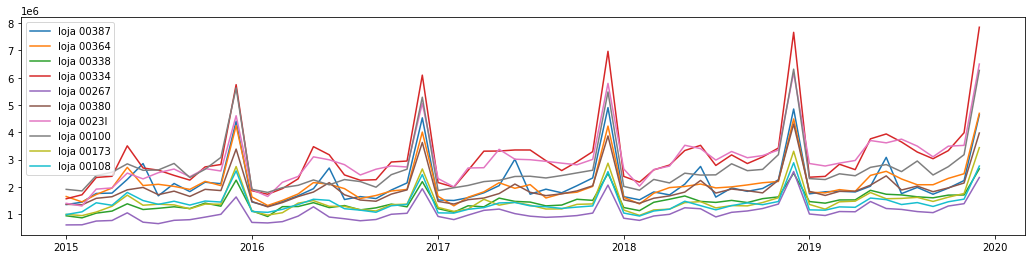

In [68]:
plt.figure(figsize=(18, 4))
#plt.plot(serie_antiga_)
n= 0
plt.plot(arquivador_realizado[n]['00171shnortesalvador'], label='loja 00387')
plt.plot(arquivador_realizado[n]['00061shdelrey'], label='loja 00364')
plt.plot(arquivador_realizado[n]['00322shterraço'], label='loja 00338')
plt.plot(arquivador_realizado[n]['00138shuniaoosasco'], label='loja 00334')
plt.plot(arquivador_realizado[n]['00267shboulevardlondrina'], label='loja 00267')
plt.plot(arquivador_realizado[n]['00182shriomararacaju'], label='loja 00380')
plt.plot(arquivador_realizado[n]['00323ljlargodomachado'], label='loja 0023l')
plt.plot(arquivador_realizado[n]['00100shamazonas'], label='loja 00100')
plt.plot(arquivador_realizado[n]['00173shnortesulplaza'], label='loja 00173')
plt.plot(arquivador_realizado[n]['00108shsantaursula'], label='loja 00108')
#plt.plot(serie_antiga_[:'2019-01-01'],label="treino")
#plt.plot(serie_antiga_['2019-01-01':], label="teste")
plt.legend()
plt.show();

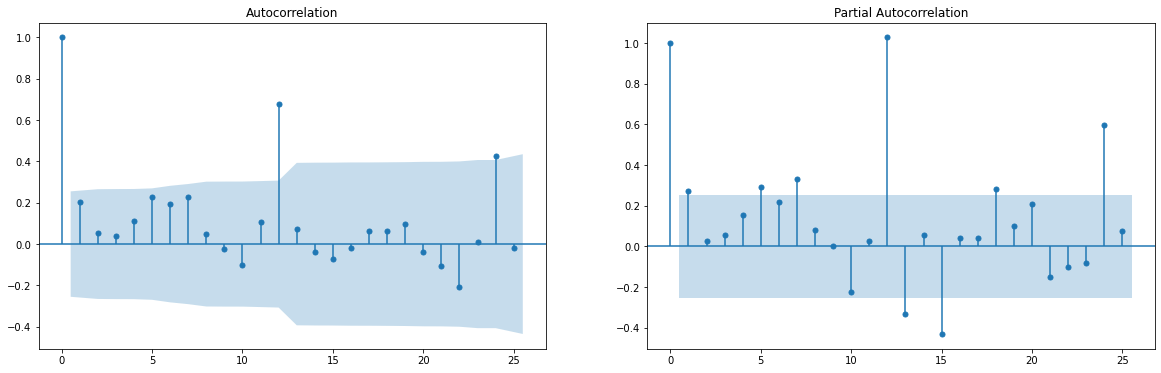

In [24]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
fig, ax = plt.subplots(1, 2, figsize=(20, 6))
plot_acf(serie_antiga_, lags=25, ax=ax[0])
plot_pacf(serie_antiga_, lags=25, method='ols', ax=ax[1])
plt.show()

In [18]:
# funções:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # ADF Test
    result = adfuller(timeseries, autolag='AIC')

    print('Augmented Dickey Fuller test (ADH Test)')
    print('='*40)
    print(f'ADF Statistic: {result[0]:>24}')
    print('-'*40)
    print(f'p-value:       {result[1]:>24}')
    print('-'*40)
    print('Critial Values:')
    print('-'*40)
    for key, value in result[4].items():
        print(f'{key:>4} :{value:>33}')
    print('='*40)

# Retornando as previsões para o banco de dados